In [54]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
sns.set()

In [56]:
titanic = pd.read_csv('./titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
valid_data = titanic.dropna(subset=['Age', 'Survived', 'Sex', 'Pclass'], how='any')
print('valid data ratio: %.3f%%' %(100 * len(valid_data) / len(titanic), ))

valid data ratio: 80.135%


In [147]:
second_feature = 'Pclass'
target = np.array(valid_data.Survived)
features = np.array([
    valid_data.Sex.replace({'male': 1, 'female': 0}),
    valid_data[second_feature],
]).transpose()
print(target[:10])
print(features[:10])

[0 1 1 1 0 0 0 1 1 1]
[[1 3]
 [0 1]
 [0 3]
 [0 1]
 [1 3]
 [1 1]
 [1 3]
 [0 3]
 [0 2]
 [0 3]]


In [148]:
clf = tree.DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, max_leaf_nodes=None)
clf = clf.fit(features[:-10], target[:-10])

In [149]:
test_data = [0, 23]
print('survived:', clf.predict([test_data])[0])
print('killed : survived =', clf.predict_proba([test_data])[0])

survived: 0
killed : survived = [0.53 0.47]


In [150]:
clf.score(features[-10:], target[-10:])

0.9

In [151]:
import graphviz
image_filename = 'titanic-surviving-decision-tree'
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=['Sex', second_feature],
    class_names=['Killed', 'Survived'],
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data) 
graph.render(image_filename, format='png', cleanup=True)

'titanic-surviving-decision-tree.png'

In [152]:
sex_range = [0, 1]
second_feature_range = np.min(valid_data[second_feature]), np.max(valid_data[second_feature])
xx, yy = np.meshgrid(sex_range, np.linspace(second_feature_range[0], second_feature_range[1], 100))

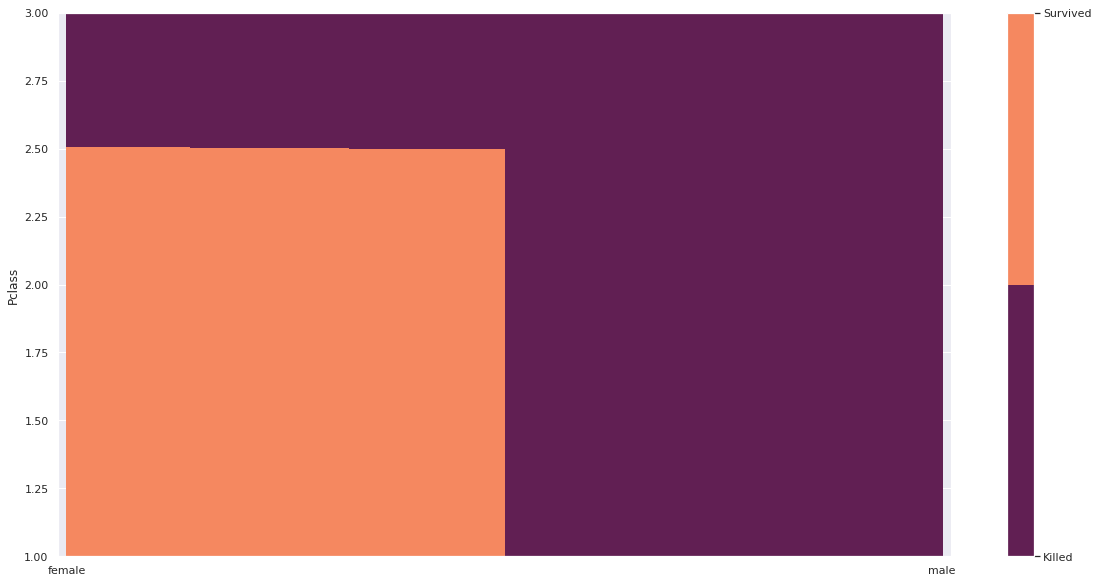

In [153]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20, 10))
plt.xlim([-0.01, 1.01])
plt.xticks([0, 1], labels=['female', 'male'])
plt.ylabel(second_feature)
cs = plt.contourf(xx, yy, Z, levels=Z.max())
cb = plt.colorbar(ticks=[0, 1])
cb.set_ticklabels(['Killed', 'Survived'])
plt.show()